**Condicones del Aire ** Modifiando la fecha


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, widgets

# Cargamos el dataset
file_path = 'LCD_sample_csv.csv'
data = pd.read_csv(file_path)
data['DATE'] = pd.to_datetime(data['DATE'])

# Determinamos el rango de fechas en los datos
min_date = data['DATE'].min()
max_date = data['DATE'].max()

# Función combinada para todas las visualizaciones
def combined_visualizations(start_date, end_date):
    filtered_data = data[(data['DATE'] >= pd.to_datetime(start_date)) & (data['DATE'] <= pd.to_datetime(end_date))]

    if not filtered_data.empty:
        # Condiciones del cielo
        sky_conditions = filtered_data['HourlySkyConditions'].fillna('Desconocido').apply(lambda x: 'Despejado' if 'CLR' in x else 'Nublado')
        conditions_count = sky_conditions.value_counts()
        plt.figure(figsize=(12, 8))
        plt.subplot(3, 1, 1)
        conditions_count.plot(kind='bar')
        plt.title(f'Condiciones del cielo desde {start_date} hasta {end_date}')
        plt.ylabel('Frecuencia')
        plt.xlabel('Condición del cielo')
        plt.xticks(rotation=45)

        # Gráfica lineal  (temperatura a lo largo del tiempo)
        plt.subplot(3, 1, 2)
        plt.plot(filtered_data['DATE'], filtered_data['HourlyDryBulbTemperatureF'], label='Temperatura (F)', marker='o', linestyle='-')
        plt.title(f'Tendencia de temperatura')
        plt.ylabel('Temperatura (F)')
        plt.xlabel('Fecha')

        # Gráfica 3D  (temperatura, humedad y velocidad del viento)
        ax = plt.subplot(3, 1, 3, projection='3d')
        ax.scatter(filtered_data['HourlyDryBulbTemperatureF'], filtered_data['HourlyRelativeHumidity'], filtered_data['HourlyWindSpeed'])
        ax.set_title('Temperatura vs. Humedad vs. Velocidad del viento')
        ax.set_xlabel('Temperatura (F)')
        ax.set_ylabel('Humedad (%)')
        ax.set_zlabel('Velocidad del viento (mph)')

        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron datos para el rango de fechas seleccionado.")

# Creando un solo conjunto de widgets de selección de fecha para controlar todas las visualizaciones
start_date_widget = widgets.DatePicker(description='Fecha Inicio', value=min_date, min=min_date, max=max_date)
end_date_widget = widgets.DatePicker(description='Fecha Fin', value=min_date, min=min_date, max=max_date)

interact(combined_visualizations, start_date=start_date_widget, end_date=end_date_widget)


interactive(children=(DatePicker(value=Timestamp('2014-03-01 00:51:00'), description='Fecha Inicio'), DatePick…

<function __main__.combined_visualizations(start_date, end_date)>

/usr/local/lib/python3.10/dist-packages/traitlets/traitlets.py:711: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  silent = bool(old_value == new_value)


# **Las mismas graficas pero por separado para que tengan una mejor vista **

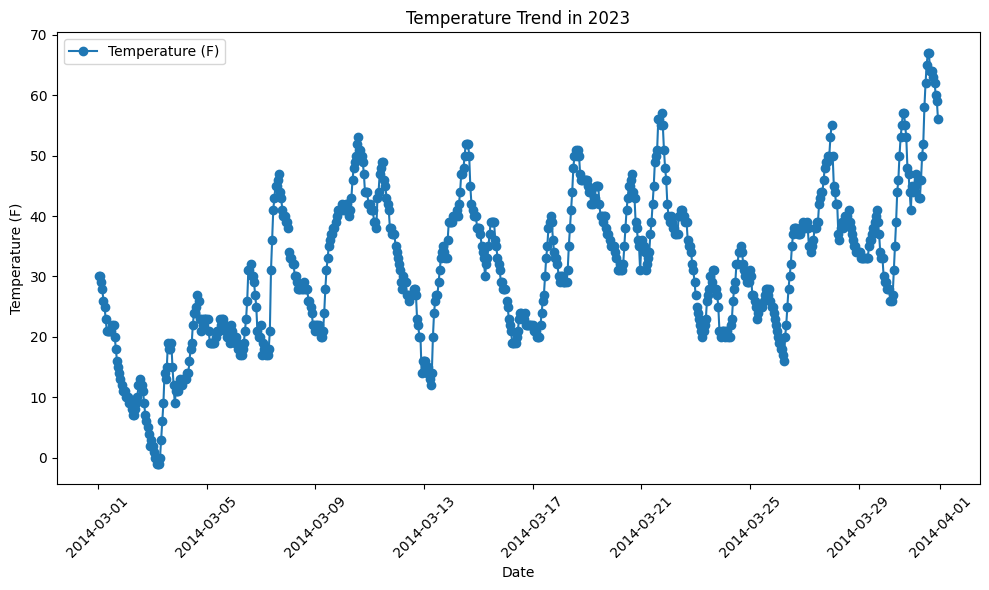

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Carga el dataset
file_path = 'LCD_sample_csv.csv'  # Asegúrate de actualizar esto con la ruta correcta
data = pd.read_csv(file_path)

# Convertimos la columna de fecha a un formato de fecha y hora para facilitar su manejo.
data['DATE'] = pd.to_datetime(data['DATE'])

# Filtrando datos para un año específico como ejemplo
data_2023 = data[data['DATE'].dt.year == 2014]

# Graficando la tendencia de la temperatura a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data_2023['DATE'], data_2023['HourlyDryBulbTemperatureF'], label='Temperature (F)', marker='o', linestyle='-')
plt.title('Temperature Trend in 2023')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

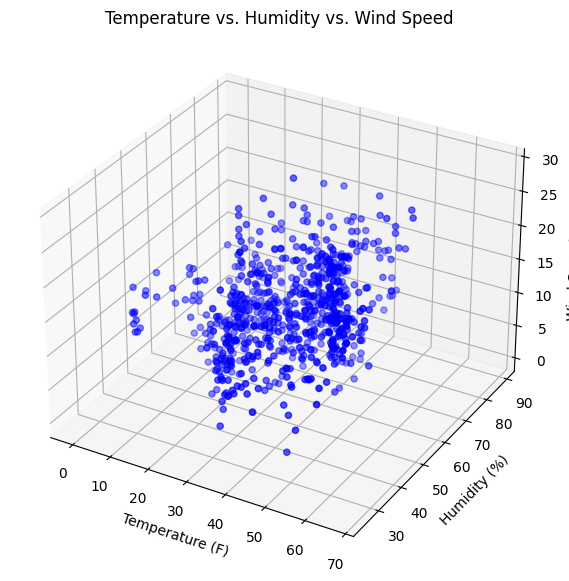

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Filtrando datos para evitar valores nulos y para un rango de fechas específico como ejemplo
filtered_data = data.dropna(subset=['HourlyDryBulbTemperatureF', 'HourlyRelativeHumidity', 'HourlyWindSpeed'])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Usando temperatura, humedad y velocidad del viento como ejes
ax.scatter(filtered_data['HourlyDryBulbTemperatureF'], filtered_data['HourlyRelativeHumidity'], filtered_data['HourlyWindSpeed'], c='blue', marker='o')
ax.set_title('Temperature vs. Humidity vs. Wind Speed')
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Wind Speed (mph)')

plt.show()

# **Coordenadas y temperatura **

In [ ]:
import pandas as pd
import folium
from ipywidgets import interact, IntRangeSlider, Dropdown
from IPython.display import display

# Cargar el dataset
file_path = 'jalisco2.csv'
data = pd.read_csv(file_path)

# Corrección del formato numérico para 'LATITUDE' y 'LONGITUDE'
data['LATITUDE'] = data['LATITUDE'].astype(str).str.replace(',', '.').astype(float)
data['LONGITUDE'] = data['LONGITUDE'].astype(str).str.replace(',', '.').astype(float)

# Asegurando que 'DATE' es tipo datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# Determinar el rango de temperaturas en el dataset
min_temp = int(data['HourlyDryBulbTemperatureF'].min())
max_temp = int(data['HourlyDryBulbTemperatureF'].max())

# Definiendo una función para asignar colores basada en la temperatura
def get_color(temperature):
    if temperature > 59:
        return '#ff0000'  # Rojo para temperaturas altas
    elif temperature > 40:
        return '#ff8000'  # Naranja para temperaturas moderadas
    else:
        return '#00BFBF'  # azul para temperaturas más bajas

# Modificación de la función para incluir filtrado por STATION_NAME
def plot_data(station_name, temp_range):
    min_selected_temp, max_selected_temp = temp_range

    filtered_data = data[(data['STATION_NAME'] == station_name) &
                         (data['HourlyDryBulbTemperatureF'] >= min_selected_temp) &
                         (data['HourlyDryBulbTemperatureF'] <= max_selected_temp)]

    if not filtered_data.empty:
        m = folium.Map(location=[filtered_data['LATITUDE'].mean(), filtered_data['LONGITUDE'].mean()], zoom_start=5)

        for index, row in filtered_data.iterrows():
            color = get_color(row['HourlyDryBulbTemperatureF'])
            folium.CircleMarker(
                location=[row['LATITUDE'], row['LONGITUDE']],
                radius=5,
                color=color,
                fill=True,
                fill_color=color,
                popup=f"Temp: {row['HourlyDryBulbTemperatureF']}°F\nDate: {row['DATE']}"
            ).add_to(m)

        display(m)
    else:
        print("No data available for the selected station and temperature range.")

# Creando el Dropdown para las estaciones
station_dropdown = Dropdown(options=['Chicago', 'Jalisco'], description='Station:')

# Widget para seleccionar el rango de temperatura
temperature_range_slider = IntRangeSlider(value=[min_temp, max_temp], min=min_temp, max=max_temp, step=1, description='Temperature Range (°F):')

# Interactividad para actualizar el mapa basado en la estación seleccionada y el rango de temperatura
interact(plot_data, station_name=station_dropdown, temp_range=temperature_range_slider)


interactive(children=(Dropdown(description='Station:', options=('Chicago', 'Jalisco'), value='Chicago'), IntRa…

<function __main__.plot_data(station_name, temp_range)>